Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Reading the Data

In [2]:
df=pd.read_csv("treadmill.csv")

About the Dataset



*   Product Purchased:	KP281, KP481, or KP781
*   Age:	            In years



*   Gender:	            Male/Female
*   Education:	        In years

*   MaritalStatus:	    Single or partnered

*   Usage:	            The average number of times the customer plans to use the treadmill each week.

*   Income:	           Annual income (in $)


*   Fitness:	       Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.



*   Miles:	           The average number of miles the customer expects to walk/run each week



Product Portfolio



*   KP281: Entry-level treadmill priced at $1,500.

*   KP481: Mid-level treadmill for runners priced at $1,750.

*   KP781: Advanced treadmill with special features priced at $2,500.




# Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics

# Objectives



1.  To perform descriptive analytics to create a comprehensive customer profile for each AeroFit treadmill product, utilizing tables and charts.

1.  To construct two-way contingency tables for each AeroFit treadmill product, analyzing the relationships between variables such as age, gender, education, marital status, usage, income, fitness level, and expected weekly miles.

1. To compute conditional and marginal probabilities for the identified contingency tables, providing insights into the distribution of customer characteristics for each treadmill product.

2. To extract actionable insights from the analysis that can guide marketing and sales strategies, enabling the team to make better recommendations to new customers based on their profiles.




1) Basic Analysis

In [3]:
df.shape

(180, 9)

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
# Datatypes of all the columns
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [6]:
# Converting Fitness Column from int to categorical
df['Fitness']=df['Fitness'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(1), int64(5), object(3)
memory usage: 11.8+ KB


In [8]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Observations:

*  There are 180 rows and 9 columns
*  There are no missing values in the dataset



In [9]:
# Statistical Summary for Numerical Columns
df.describe()

,Age,Education,Usage,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,53719.577778,103.194444
std,6.943498,1.617055,1.084797,16506.684226,51.863605
min,18.000000,12.000000,2.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,104581.000000,360.000000


In [12]:
# Value counts and unique attributes for categorical columns
cat_cols = ['Product', 'Gender', 'MaritalStatus','Fitness']
for column in cat_cols:
    print(f"\nColumn: {column}")
    print("Value Counts:")
    print(df[column].value_counts())
    print("\nUnique Attributes:")
    print(df[column].unique())
    print("-" * 30)


Column: Product
Value Counts:
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

Unique Attributes:
['KP281' 'KP481' 'KP781']
------------------------------

Column: Gender
Value Counts:
Male      104
Female     76
Name: Gender, dtype: int64

Unique Attributes:
['Male' 'Female']
------------------------------

Column: MaritalStatus
Value Counts:
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Unique Attributes:
['Single' 'Partnered']
------------------------------

Column: Fitness
Value Counts:
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

Unique Attributes:
[4, 3, 2, 1, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
------------------------------


2) Detection of Outliers



a. Finding outliers for each continuous variable
   



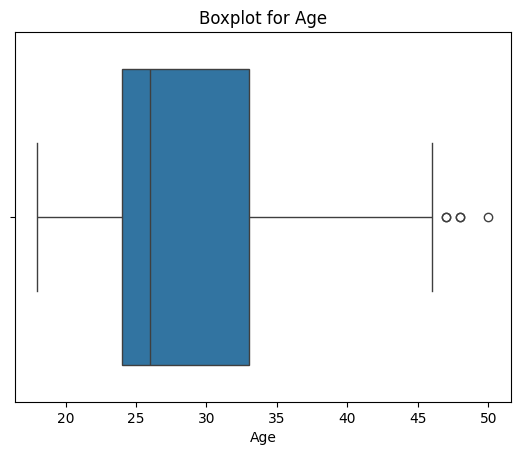

In [13]:
# Checking outliers for 'Age' column
plt.title("Boxplot for Age")
sns.boxplot(data=df,x='Age')
plt.show()

In [14]:
q1= np.percentile(df['Age'], 25)
q3= np.percentile(df['Age'], 75)
IQR=q3-q1
upper_limit = q3 + 1.5 * IQR

# All values greater than the upper limit are outliers
outliers_age = df[df["Age"]>upper_limit]
k=len(outliers_age)
print(f"There are {k} outliers in 'Age' column")

There are 5 outliers in 'Age' column


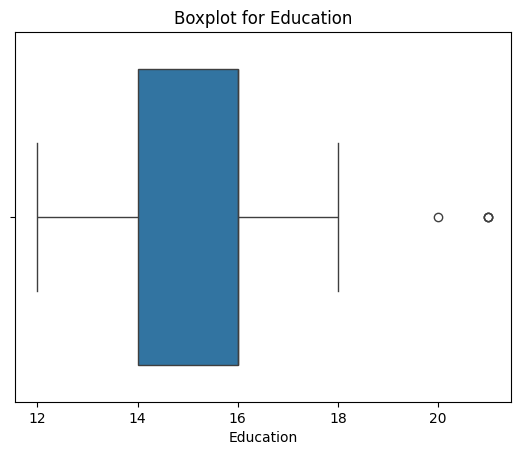

In [15]:
# Checking outliers for 'Education' column
plt.title("Boxplot for Education")
sns.boxplot(data=df,x='Education')
plt.show()

In [16]:
q1= np.percentile(df['Education'], 25)
q3= np.percentile(df['Education'], 75)
IQR=q3-q1
upper_limit = q3 + 1.5 * IQR

# All values greater than the upper limit are outliers
outliers_education= df[df["Education"]>upper_limit]
k=len(outliers_education)
print(f"There are {k} outliers in 'Education' column")

There are 4 outliers in 'Education' column


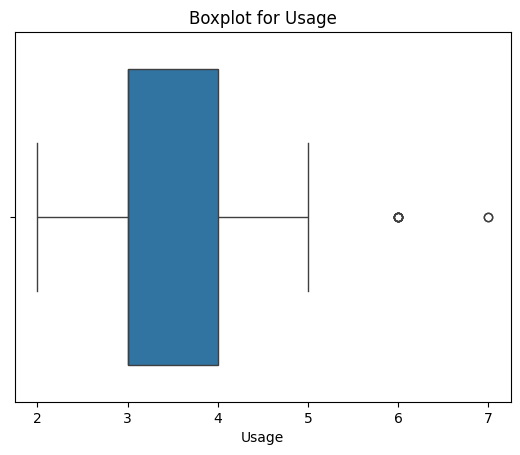

In [17]:
# Checking outliers for 'Usage' column
plt.title("Boxplot for Usage")
sns.boxplot(data=df,x='Usage')
plt.show()

In [18]:
q1= np.percentile(df['Usage'], 25)
q3= np.percentile(df['Usage'], 75)
IQR=q3-q1
upper_limit = q3 + 1.5 * IQR

# All values greater than the upper limit are outliers
outliers_usage= df[df["Usage"]>upper_limit]
k=len(outliers_usage)
print(f"There are {k} outliers in 'Usage' column")

There are 9 outliers in 'Usage' column


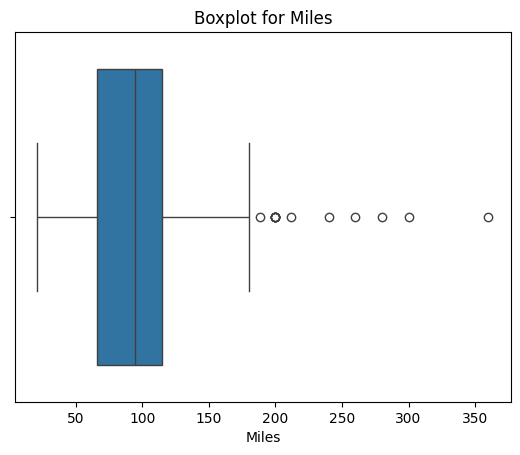

In [19]:
# Checking outliers for 'Miles' column
plt.title("Boxplot for Miles")
sns.boxplot(data=df,x='Miles')
plt.show()

In [20]:
q1= np.percentile(df['Miles'], 25)
q3= np.percentile(df['Miles'], 75)
IQR=q3-q1
upper_limit = q3 + 1.5 * IQR

# All values greater than the upper limit are outliers
outliers_miles= df[df["Miles"]>upper_limit]
k=len(outliers_miles)
print(f"There are {k} outliers in 'Miles' column")

There are 13 outliers in 'Miles' column



b. Clipping the data between the 5 percentile and 95 percentile for numerical columns




In [21]:
numerical_columns = ['Age','Education','Usage','Income','Miles']
for col in numerical_columns:
    df[col]=np.clip(df[col],np.percentile(df[col],5),np.percentile(df[col],95))

3) Effect of features on the product purchased

a. Relationship between categorical variables and 'Product'

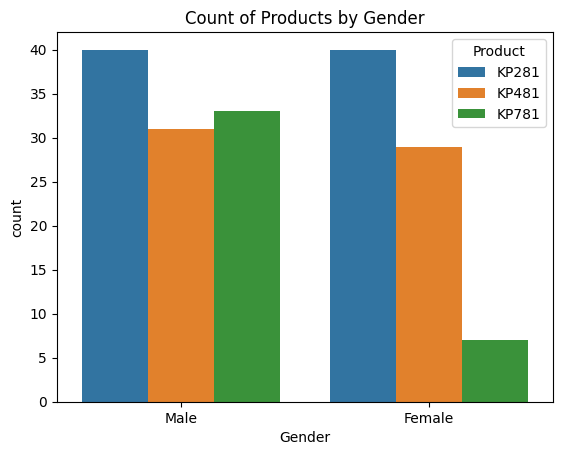

In [22]:
# Visualizing the distribution of product purchases based on Gender
sns.countplot(data=df,x='Gender',hue='Product')
plt.title('Count of Products by Gender')
plt.show()

Observations:


* There aren't significant differences in the purchase patterns of products KP281 and KP481 between males and females.
* More males tend to purchase product KP781 compared to females.



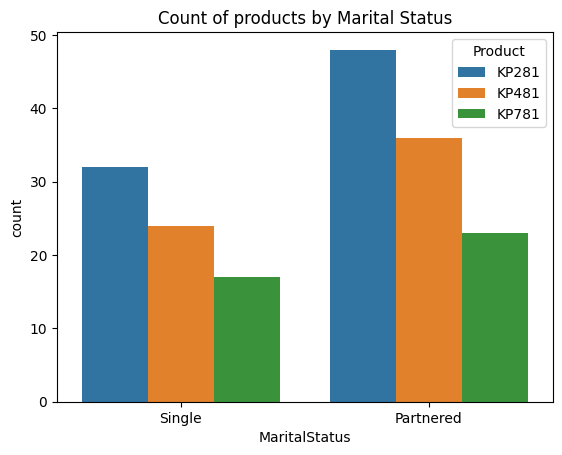

In [23]:
# Visualizing the distribution of product purchases based on Marital Status
sns.countplot(data=df,x='MaritalStatus',hue='Product')
plt.title("Count of products by Marital Status")
plt.show()

Observation: A greater number of married individuals tend to purchase all three products compared to single individuals

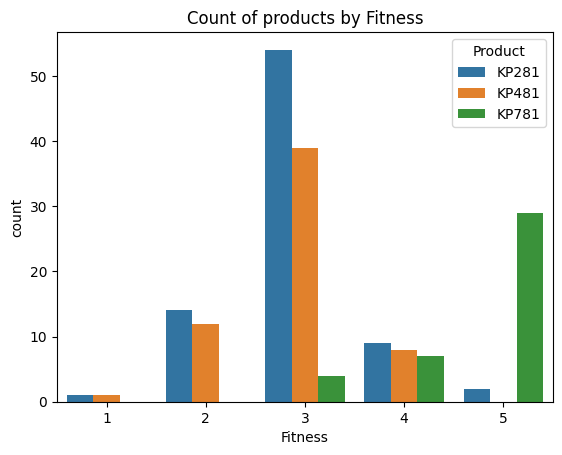

In [24]:
# Visualizing the distribution of product purchases based on Fitness
sns.countplot(data=df,x='Fitness',hue='Product')
plt.title("Count of products by Fitness")
plt.show()

Observations:


*   Only People with a fitness scale of 5 tend to purchase the product KP781
*   People with a fitness scale of 3 mostly purchase KP281 and KP481



b. Relationship between continuous variables and 'Product'

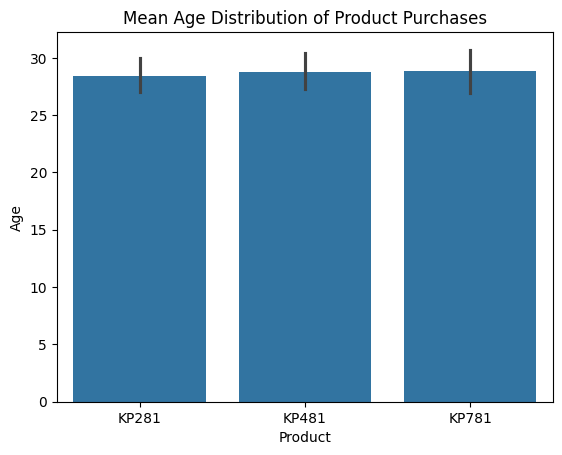

In [25]:
# Visualizing the mean age for each product
sns.barplot(data=df,y='Age',x='Product')
plt.title("Mean Age Distribution of Product Purchases")
plt.show()

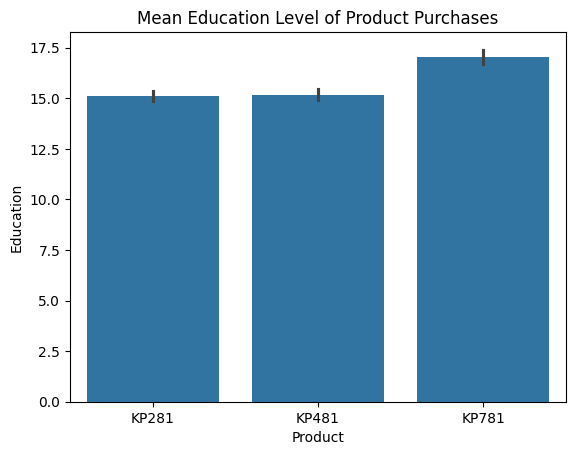

In [26]:
# Visualizing the mean education level for each product
sns.barplot(data=df,y='Education',x='Product')
plt.title("Mean Education Level of Product Purchases")
plt.show()

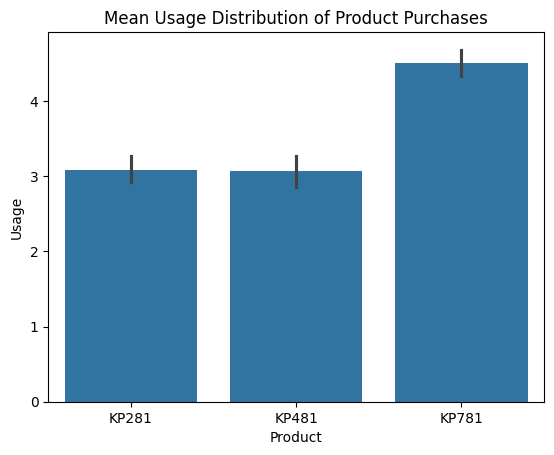

In [27]:
# Visualizing the mean usage for each product
sns.barplot(data=df,y='Usage',x='Product')
plt.title("Mean Usage Distribution of Product Purchases")
plt.show()

Observation: Customers with mean usage of more than 4 tend to purchase KP781

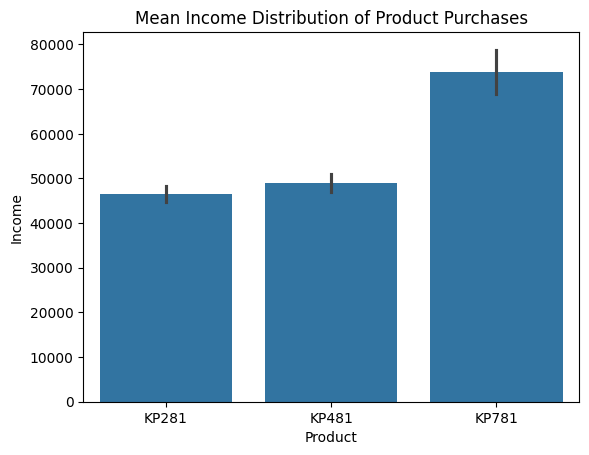

In [28]:
# Visualizing the mean income for each product
sns.barplot(data=df,y='Income',x='Product')
plt.title("Mean Income Distribution of Product Purchases")
plt.show()

Observation: Customers with mean income of more than $70000 tend to purchase KP781

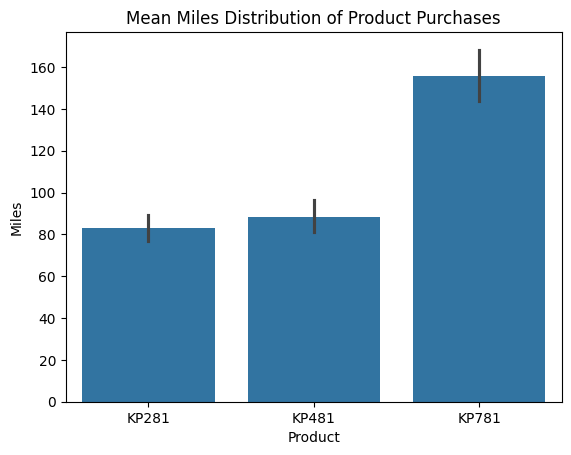

In [29]:
# Visualizing the mean miles expected to walk/run for each product
sns.barplot(data=df,y='Miles',x='Product')
plt.title("Mean Miles Distribution of Product Purchases")
plt.show()

Observation: Customers who run more than a mean of 150 miles tend to purchase KP781

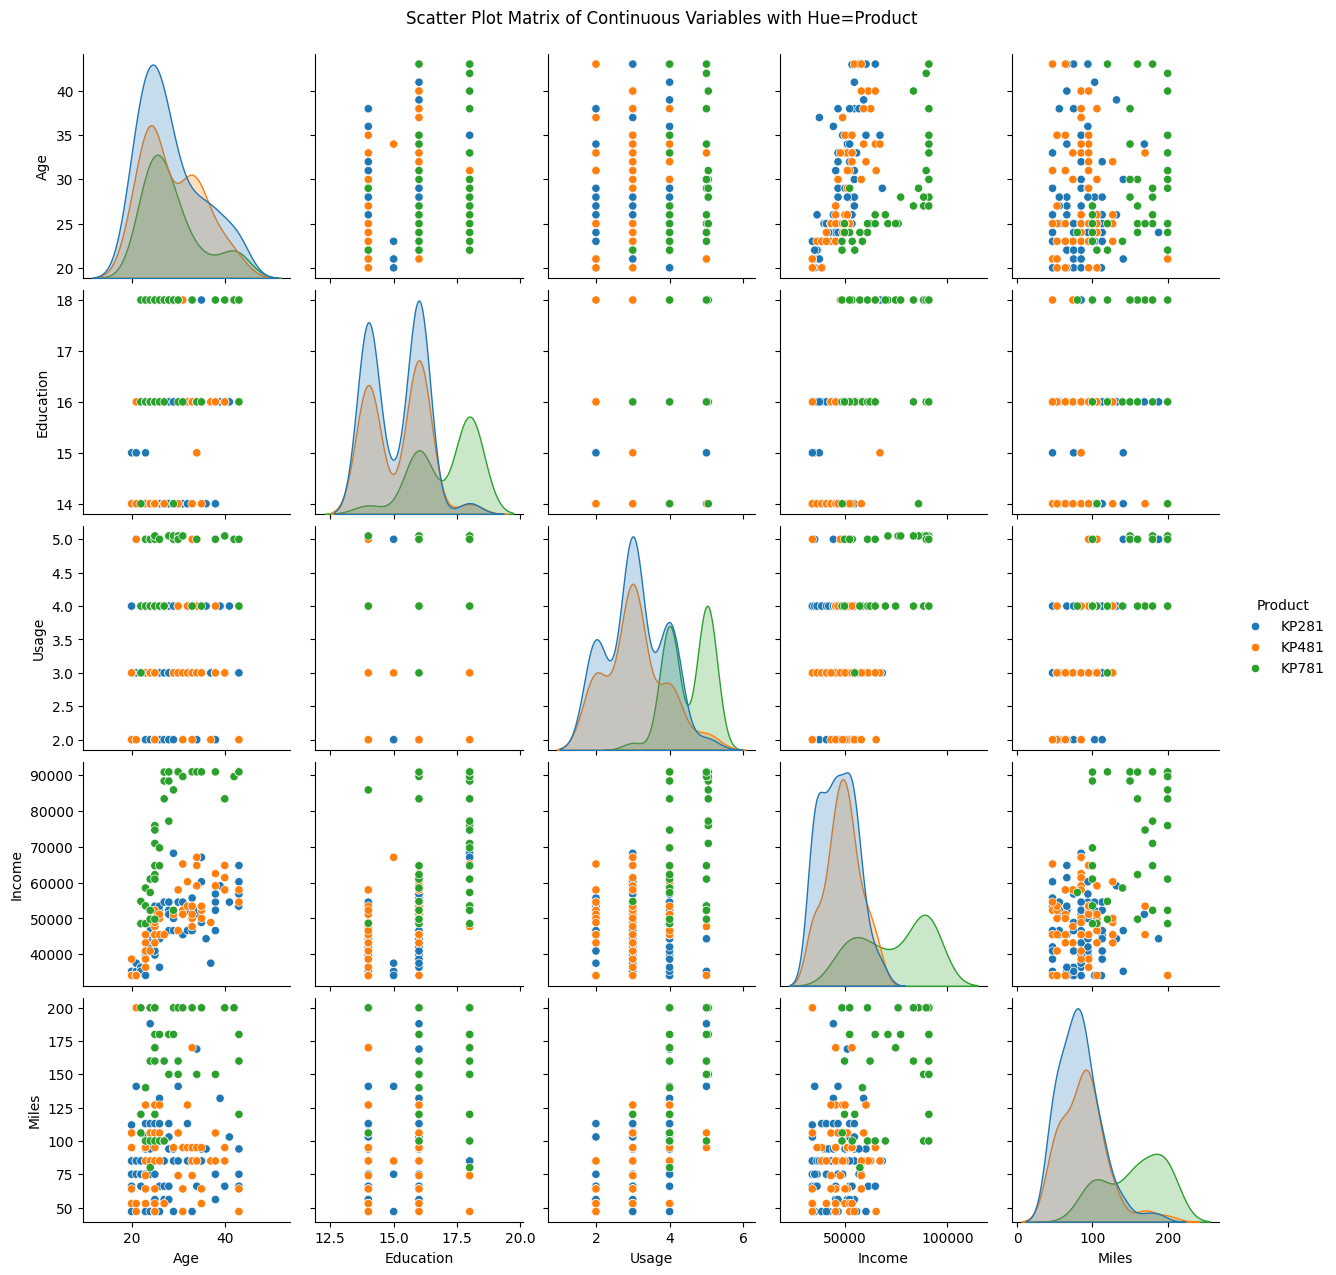

In [30]:
# Scatter plot matrix with hue="Product"
sns.pairplot(df, hue='Product', vars=['Age', 'Education', 'Usage', 'Income', 'Miles'])
plt.suptitle('Scatter Plot Matrix of Continuous Variables with Hue=Product', y=1.02)
plt.show()

Observation: Apart from the plots Age-Income ,Age-Miles and Income-Miles with hue=Product, there are no relationships between the other continuous variables and Product variable

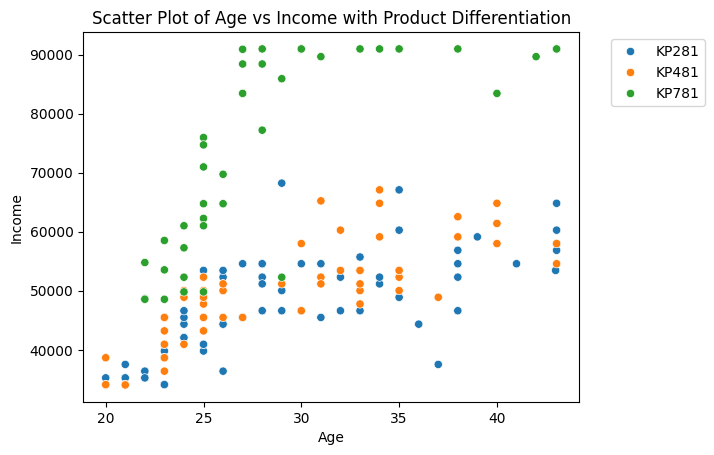

In [31]:
# Relationship between age and income, differentiated by product purchased
sns.scatterplot(data=df,x='Age',y='Income',hue='Product')
plt.title("Scatter Plot of Age vs Income with Product Differentiation")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Observation: Customers with an age of more than 30 and an income of about $90,000 mostly tend to purchase KP781

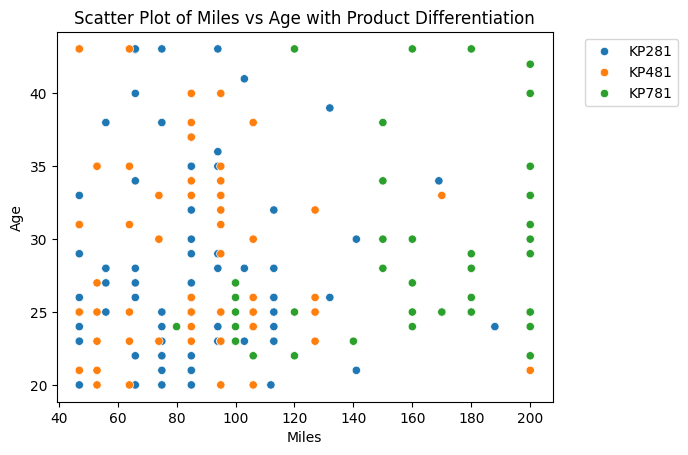

In [32]:
# Relationship between age and miles, differentiated by product purchased
sns.scatterplot(data=df,x='Miles',y='Age',hue='Product')
plt.title("Scatter Plot of Miles vs Age with Product Differentiation")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Observation: Customers with an age of more than 25 and an average of more than 150 miles mostly tend to buy KP781

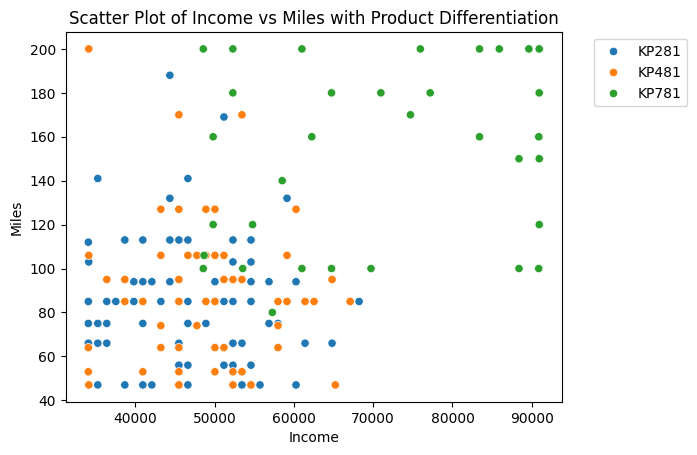

In [33]:
# Relationship between income and miles, differentiated by product purchased
sns.scatterplot(data=df,x='Income',y='Miles',hue='Product')
plt.title("Scatter Plot of Income vs Miles with Product Differentiation")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Observation: Customers with an income of more than $70,000 and an average of more than 100 miles mostly tend to buy KP781

4) Representing the Probability

a. Finding percentage of customers who have purchased
KP281, KP481, or KP781


In [34]:
# Crosstab to find marginal probability
marginal_prob = pd.crosstab(index=df['Product'], columns='percentage', normalize=True) * 100
marginal_prob.columns = ['Percentage']

print("Marginal Probability of Each Product:")
print(marginal_prob)

print("\nObservations:")
print(f"The probability of customers purchasing KP281 is approximately {marginal_prob.loc['KP281', 'Percentage']:.2f}%.")
print(f"The probability of customers purchasing KP481 is approximately {marginal_prob.loc['KP481', 'Percentage']:.2f}%.")
print(f"The probability of customers purchasing KP781 is approximately {marginal_prob.loc['KP781', 'Percentage']:.2f}%.")

Marginal Probability of Each Product:
         Percentage
Product            
KP281     44.444444
KP481     33.333333
KP781     22.222222

Observations:
The probability of customers purchasing KP281 is approximately 44.44%.
The probability of customers purchasing KP481 is approximately 33.33%.
The probability of customers purchasing KP781 is approximately 22.22%.


b. Finding the probability that the customer buys a product based on each column

In [35]:
# For Categorical Columns
for column in ['Gender','MaritalStatus','Fitness']:

    # Creating a crosstab to calculate marginal probabilities for each product based on the current column
    marginal_prob_column = pd.crosstab(index=df['Product'], columns=df[column], normalize='index') * 100

    print(f"\nProbability of Purchasing Each Product Based on {column}:")
    print(marginal_prob_column)


Probability of Purchasing Each Product Based on Gender:
Gender      Female       Male
Product                      
KP281    50.000000  50.000000
KP481    48.333333  51.666667
KP781    17.500000  82.500000

Probability of Purchasing Each Product Based on MaritalStatus:
MaritalStatus  Partnered  Single
Product                         
KP281               60.0    40.0
KP481               60.0    40.0
KP781               57.5    42.5

Probability of Purchasing Each Product Based on Fitness:
Fitness         1     2     3          4     5
Product                                       
KP281    1.250000  17.5  67.5  11.250000   2.5
KP481    1.666667  20.0  65.0  13.333333   0.0
KP781    0.000000   0.0  10.0  17.500000  72.5


In [36]:
# For continuous columns
continuous_columns = ['Age', 'Education', 'Usage', 'Income', 'Miles']

for column in continuous_columns:

    # Creating a crosstab to calculate marginal probabilities for each product based on the current continuous column
    marginal_prob_column = pd.crosstab(index=df['Product'], columns=pd.cut(df[column], bins=5, precision=0, include_lowest=True), normalize='index') * 100

    print(f"\nProbability of Purchasing Each Product Based on {column}:")
    print(marginal_prob_column)


Probability of Purchasing Each Product Based on Age:
Age      (19.0, 25.0]  (25.0, 29.0]  (29.0, 34.0]  (34.0, 38.0]  (38.0, 43.0]
Product                                                                      
KP281       33.750000     32.500000          10.0     13.750000     10.000000
KP481       28.333333     26.666667          20.0     16.666667      8.333333
KP781       25.000000     42.500000          12.5      7.500000     12.500000

Probability of Purchasing Each Product Based on Education:
Education  (13.9, 14.8]  (14.8, 15.6]  (15.6, 16.4]  (17.2, 18.0]
Product                                                          
KP281         43.750000      5.000000     48.750000      2.500000
KP481         43.333333      1.666667     51.666667      3.333333
KP781          5.000000      0.000000     37.500000     57.500000

Probability of Purchasing Each Product Based on Usage:
Usage    (1.9, 2.6]  (2.6, 3.2]  (3.8, 4.4]  (4.4, 5.0]
Product                                               

c. Finding the conditional probability that an event occurs given that another event
has occurred

In [37]:
# Conditional probabilities of purchasing each product based on Gender
crosstab_result = pd.crosstab(index=df['Product'], columns=df['Gender'], normalize='columns') * 100

print("Conditional Probability of Purchasing Each Product Based on Gender:")
print(crosstab_result)

print("\nObservations:")
for product in crosstab_result.index:
    for gender in crosstab_result.columns:
        probability = crosstab_result.loc[product, gender]
        print(f"The probability that customers buy {product} given they are {gender.lower()}s is {probability:.2f}%.")

Conditional Probability of Purchasing Each Product Based on Gender:
Gender      Female       Male
Product                      
KP281    52.631579  38.461538
KP481    38.157895  29.807692
KP781     9.210526  31.730769

Observations:
The probability that customers buy KP281 given they are females is 52.63%.
The probability that customers buy KP281 given they are males is 38.46%.
The probability that customers buy KP481 given they are females is 38.16%.
The probability that customers buy KP481 given they are males is 29.81%.
The probability that customers buy KP781 given they are females is 9.21%.
The probability that customers buy KP781 given they are males is 31.73%.


In [38]:
# Conditional probabilities of purchasing each product based on MaritalStatus
crosstab_result = pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], normalize='columns') * 100

print("Conditional Probability of Purchasing Each Product Based on MaritalStatus:")
print(crosstab_result)

print("\nObservations:")
for product in crosstab_result.index:
    for status in crosstab_result.columns:
        probability = crosstab_result.loc[product, status]
        print(f"The probability that customers buy {product} given they are {status.lower()} is {probability:.2f}%.")

Conditional Probability of Purchasing Each Product Based on MaritalStatus:
MaritalStatus  Partnered     Single
Product                            
KP281          44.859813  43.835616
KP481          33.644860  32.876712
KP781          21.495327  23.287671

Observations:
The probability that customers buy KP281 given they are partnered is 44.86%.
The probability that customers buy KP281 given they are single is 43.84%.
The probability that customers buy KP481 given they are partnered is 33.64%.
The probability that customers buy KP481 given they are single is 32.88%.
The probability that customers buy KP781 given they are partnered is 21.50%.
The probability that customers buy KP781 given they are single is 23.29%.


In [39]:
# Conditional probabilities of purchasing each product based on Fitness
crosstab_result = pd.crosstab(index=df['Product'], columns=df['Fitness'], normalize='columns') * 100

print("Conditional Probability of Purchasing Each Product Based on Fitness:")
print(crosstab_result)

print("\nObservations:")
for product in crosstab_result.index:
    for fit in crosstab_result.columns:
        probability = crosstab_result.loc[product, fit]
        print(f"The probability that customers buy {product} given they have a fitness scale of {fit} is {probability:.2f}%.")

Conditional Probability of Purchasing Each Product Based on Fitness:
Fitness     1          2          3          4          5
Product                                                  
KP281    50.0  53.846154  55.670103  37.500000   6.451613
KP481    50.0  46.153846  40.206186  33.333333   0.000000
KP781     0.0   0.000000   4.123711  29.166667  93.548387

Observations:
The probability that customers buy KP281 given they have a fitness scale of 1 is 50.00%.
The probability that customers buy KP281 given they have a fitness scale of 2 is 53.85%.
The probability that customers buy KP281 given they have a fitness scale of 3 is 55.67%.
The probability that customers buy KP281 given they have a fitness scale of 4 is 37.50%.
The probability that customers buy KP281 given they have a fitness scale of 5 is 6.45%.
The probability that customers buy KP481 given they have a fitness scale of 1 is 50.00%.
The probability that customers buy KP481 given they have a fitness scale of 2 is 46.15%.
The 

In [40]:
# Conditional probabilities of purchasing each product based on Age

# Bin the continuous column
df['Age_Bin'] = pd.cut(df['Age'], bins=5, precision=0, include_lowest=True)

# Calculate conditional probabilities
crosstab_result = pd.crosstab(index=df['Product'], columns=df['Age_Bin'], normalize='columns') * 100

# Display conditional probabilities
print("Conditional Probability of Purchasing Each Product Based on Age:")
print(crosstab_result)

print("\nObservations:")
for product in crosstab_result.index:
    for age_bin in crosstab_result.columns:
        probability = crosstab_result.loc[product, age_bin]
        print(f"The probability that customers buy {product} given they have their age in the range {age_bin} is {probability:.2f}%.")

Conditional Probability of Purchasing Each Product Based on Age:
Age_Bin  (19.0, 25.0]  (25.0, 29.0]  (29.0, 34.0]  (34.0, 38.0]  (38.0, 43.0]
Product                                                                      
KP281       50.000000     44.067797          32.0     45.833333     44.444444
KP481       31.481481     27.118644          48.0     41.666667     27.777778
KP781       18.518519     28.813559          20.0     12.500000     27.777778

Observations:
The probability that customers buy KP281 given they have their age in the range (19.0, 25.0] is 50.00%.
The probability that customers buy KP281 given they have their age in the range (25.0, 29.0] is 44.07%.
The probability that customers buy KP281 given they have their age in the range (29.0, 34.0] is 32.00%.
The probability that customers buy KP281 given they have their age in the range (34.0, 38.0] is 45.83%.
The probability that customers buy KP281 given they have their age in the range (38.0, 43.0] is 44.44%.
The probab

In [41]:
# Conditional probabilities of purchasing each product based on Education

# Bin the continuous column
df['Education_Bin'] = pd.cut(df['Education'], bins=5, precision=0, include_lowest=True)

# Calculate conditional probabilities
crosstab_result = pd.crosstab(index=df['Product'], columns=df['Education_Bin'], normalize='columns') * 100

# Display conditional probabilities
print("Conditional Probability of Purchasing Each Product Based on Education:")
print(crosstab_result)

print("\nObservations:")
for product in crosstab_result.index:
    for edu_bin in crosstab_result.columns:
        probability = crosstab_result.loc[product, edu_bin]
        print(f"The probability that customers buy {product} given they have education in the range {edu_bin} is {probability:.2f}%.")

Conditional Probability of Purchasing Each Product Based on Education:
Education_Bin  (13.9, 14.8]  (14.8, 15.6]  (15.6, 16.4]  (17.2, 18.0]
Product                                                              
KP281             55.555556          80.0     45.882353      7.407407
KP481             41.269841          20.0     36.470588      7.407407
KP781              3.174603           0.0     17.647059     85.185185

Observations:
The probability that customers buy KP281 given they have education in the range (13.9, 14.8] is 55.56%.
The probability that customers buy KP281 given they have education in the range (14.8, 15.6] is 80.00%.
The probability that customers buy KP281 given they have education in the range (15.6, 16.4] is 45.88%.
The probability that customers buy KP281 given they have education in the range (17.2, 18.0] is 7.41%.
The probability that customers buy KP481 given they have education in the range (13.9, 14.8] is 41.27%.
The probability that customers buy KP481 give

In [42]:
# Conditional probabilities of purchasing each product based on Usage

# Bin the continuous column
df['Usage_Bin'] = pd.cut(df['Usage'], bins=5, precision=0, include_lowest=True)

# Calculate conditional probabilities
crosstab_result = pd.crosstab(index=df['Product'], columns=df['Usage_Bin'], normalize='columns') * 100

# Display conditional probabilities
print("Conditional Probability of Purchasing Each Product Based on Usage:")
print(crosstab_result)

print("\nObservations:")
for product in crosstab_result.index:
    for use_bin in crosstab_result.columns:
        probability = crosstab_result.loc[product, use_bin]
        print(f"The probability that customers buy {product} given they have average usage in the range {use_bin} is {probability:.2f}%.")

Conditional Probability of Purchasing Each Product Based on Usage:
Usage_Bin  (1.9, 2.6]  (2.6, 3.2]  (3.8, 4.4]  (4.4, 5.0]
Product                                                  
KP281       57.575758   53.623188   42.307692    7.692308
KP481       42.424242   44.927536   23.076923   11.538462
KP781        0.000000    1.449275   34.615385   80.769231

Observations:
The probability that customers buy KP281 given they have average usage in the range (1.9, 2.6] is 57.58%.
The probability that customers buy KP281 given they have average usage in the range (2.6, 3.2] is 53.62%.
The probability that customers buy KP281 given they have average usage in the range (3.8, 4.4] is 42.31%.
The probability that customers buy KP281 given they have average usage in the range (4.4, 5.0] is 7.69%.
The probability that customers buy KP481 given they have average usage in the range (1.9, 2.6] is 42.42%.
The probability that customers buy KP481 given they have average usage in the range (2.6, 3.2] is 4

In [43]:
# Conditional probabilities of purchasing each product based on Income

# Bin the continuous column
df['Income_Bin'] = pd.cut(df['Income'], bins=5, precision=0, include_lowest=True)

# Calculate conditional probabilities
crosstab_result = pd.crosstab(index=df['Product'], columns=df['Income_Bin'], normalize='columns') * 100

# Display conditional probabilities
print("Conditional Probability of Purchasing Each Product Based on Income:")
print(crosstab_result)

print("\nObservations:")
for product in crosstab_result.index:
    for inc_bin in crosstab_result.columns:
        probability = crosstab_result.loc[product, inc_bin]
        print(f"The probability that customers buy {product} given they have an average income in the range {inc_bin} is {probability:.2f}%.")

Conditional Probability of Purchasing Each Product Based on Income:
Income_Bin  (33995.0, 45432.0]  (45432.0, 56811.0]  (56811.0, 68190.0]  \
Product                                                                  
KP281                69.387755           46.153846           32.142857   
KP481                30.612245           42.307692           42.857143   
KP781                 0.000000           11.538462           25.000000   

Income_Bin  (68190.0, 79569.0]  (79569.0, 90948.0]  
Product                                             
KP281                16.666667                 0.0  
KP481                 0.000000                 0.0  
KP781                83.333333               100.0  

Observations:
The probability that customers buy KP281 given they have an average income in the range (33995.0, 45432.0] is 69.39%.
The probability that customers buy KP281 given they have an average income in the range (45432.0, 56811.0] is 46.15%.
The probability that customers buy KP281 give

In [44]:
# Conditional probabilities of purchasing each product based on Miles

# Bin the continuous column
df['Miles_Bin'] = pd.cut(df['Miles'], bins=5, precision=0, include_lowest=True)

# Calculate conditional probabilities
crosstab_result = pd.crosstab(index=df['Miles'], columns=df['Miles_Bin'], normalize='columns') * 100

# Display conditional probabilities
print("Conditional Probability of Purchasing Each Product Based on Miles:")
print(crosstab_result)

print("\nObservations:")
for product in crosstab_result.index:
    for mile_bin in crosstab_result.columns:
        probability = crosstab_result.loc[product, mile_bin]
        print(f"The probability that customers buy {product} given they have an average miles in the range {mile_bin} is {probability:.2f}%.")

Conditional Probability of Purchasing Each Product Based on Miles:
Miles_Bin  (46.0, 78.0]  (78.0, 108.0]  (108.0, 139.0]  (139.0, 169.0]  \
Miles                                                                    
47            28.813559       0.000000        0.000000        0.000000   
53            11.864407       0.000000        0.000000        0.000000   
56            10.169492       0.000000        0.000000        0.000000   
64            10.169492       0.000000        0.000000        0.000000   
66            16.949153       0.000000        0.000000        0.000000   
74             5.084746       0.000000        0.000000        0.000000   
75            16.949153       0.000000        0.000000        0.000000   
80             0.000000       1.492537        0.000000        0.000000   
85             0.000000      40.298507        0.000000        0.000000   
94             0.000000      11.940299        0.000000        0.000000   
95             0.000000      17.910448       

5) Checking the correlation among different factors


In [47]:
# Calculating the correlation matrix for the DataFrame
df.corr()

,Age,Education,Usage,Income,Miles
Age,1.000000,0.301971,0.015394,0.514362,0.029636
Education,0.301971,1.000000,0.413600,0.628597,0.377294
Usage,0.015394,0.413600,1.000000,0.481608,0.771030
Income,0.514362,0.628597,0.481608,1.000000,0.537297
Miles,0.029636,0.377294,0.771030,0.537297,1.000000


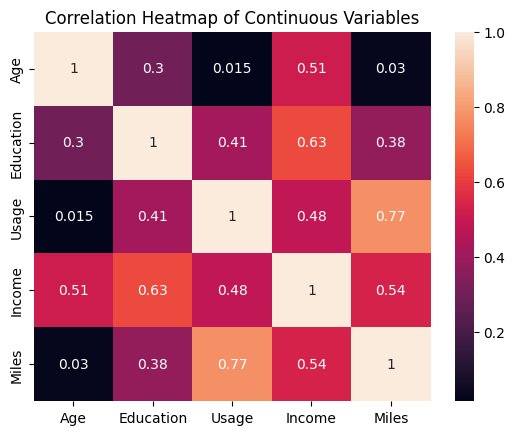

In [48]:
# Visualizing the correlation matrix using a heatmap to identify relationships between continuous variables.
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()

Observations:


*   There is a strong positive correlation between Usage and Miles.
*   There is a moderate positive correlation Education and Income.
*   There is a weak positive correlation between Age and Miles.
*   There is a very weak positive correlation between Usage and Age.






6) Customer profiling and recommendation

In [49]:
# Customer Profiling for KP281
kp281_data = df[df['Product'] == 'KP281']

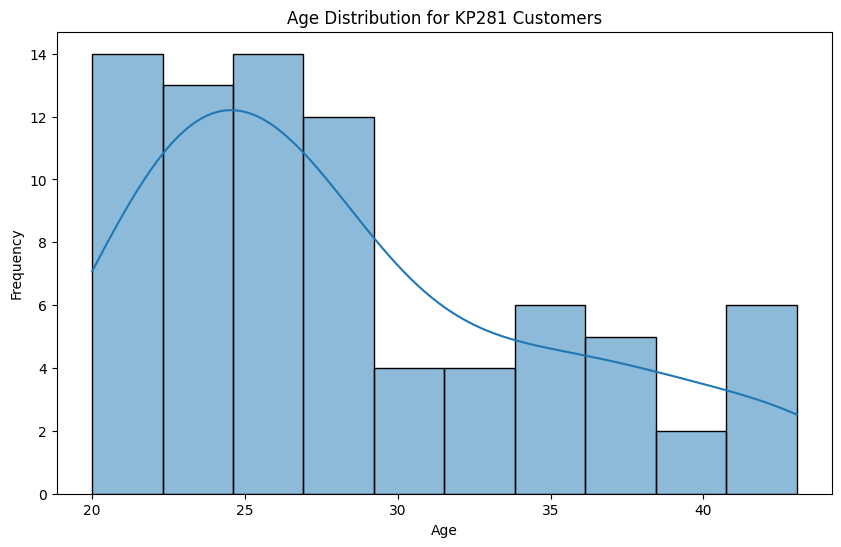

In [50]:
# Age Group Analysis
plt.figure(figsize=(10, 6))
sns.histplot(kp281_data['Age'], bins=10, kde=True)
plt.title('Age Distribution for KP281 Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

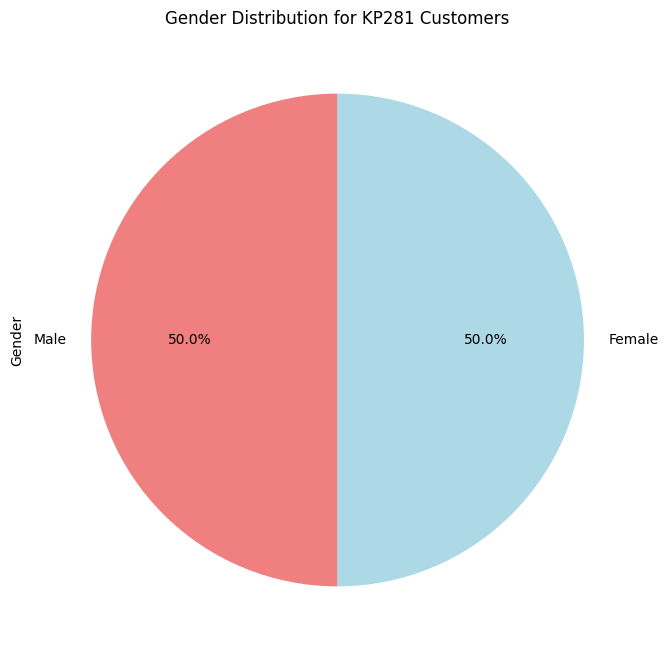

In [51]:
# Gender Analysis
plt.figure(figsize=(8, 8))
kp281_data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Gender Distribution for KP281 Customers')
plt.show()

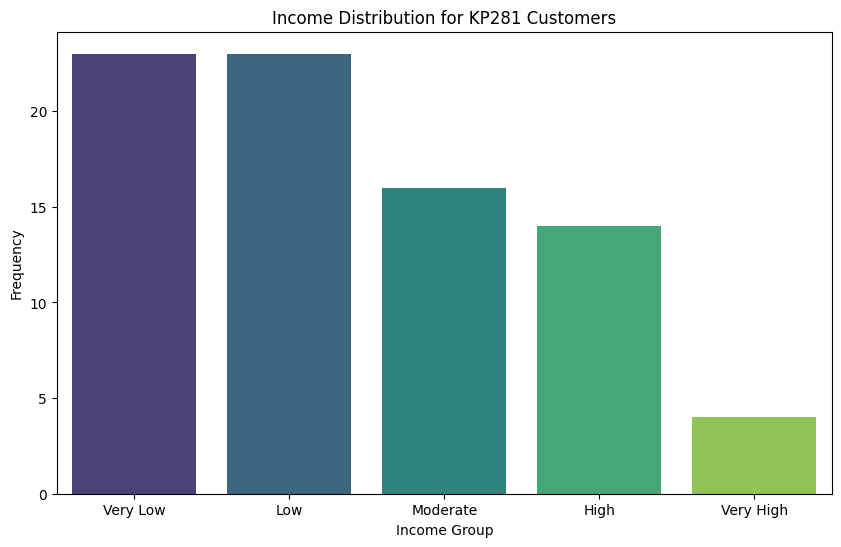

In [52]:
# Income Group Analysis with adjusted bins

# Define custom labels for income groups
num_bins = 5
income_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# Use pd.cut to create income bins
kp281_data['Income Group'] = pd.cut(kp281_data['Income'], bins=num_bins, labels=income_labels)

# Plot the income distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Income Group', data=kp281_data, palette='viridis')
plt.title('Income Distribution for KP281 Customers')
plt.xlabel('Income Group')
plt.ylabel('Frequency')
plt.show()

In [53]:
# Customer Profiling for KP481
kp481_data = df[df['Product'] == 'KP481']

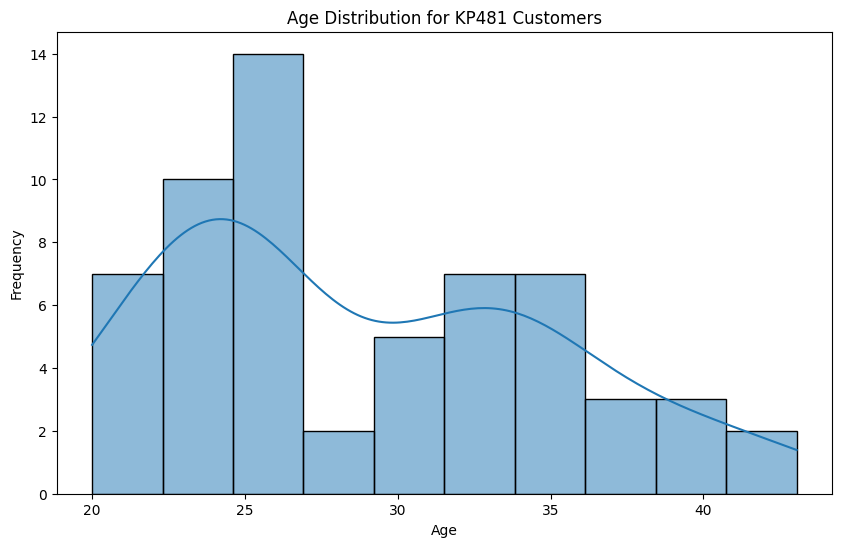

In [54]:
# Age Group Analysis
plt.figure(figsize=(10, 6))
sns.histplot(kp481_data['Age'], bins=10, kde=True)
plt.title('Age Distribution for KP481 Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

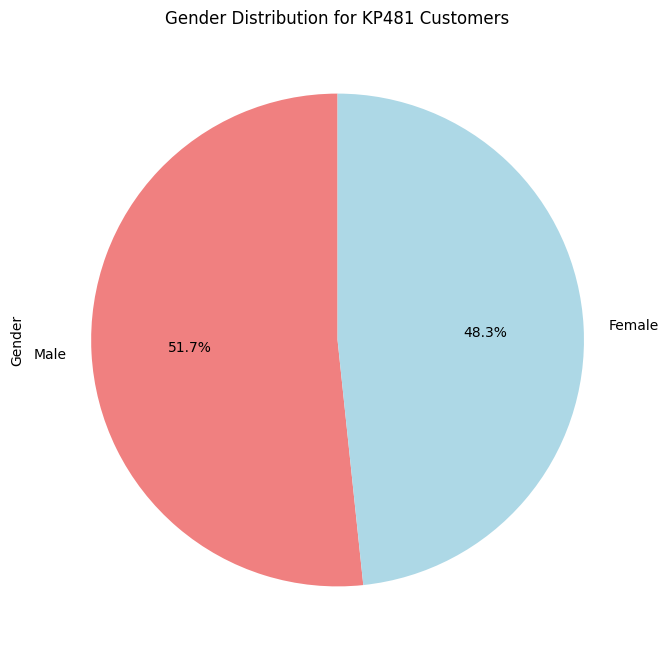

In [55]:
# Gender Analysis
plt.figure(figsize=(8, 8))
kp481_data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Gender Distribution for KP481 Customers')
plt.show()

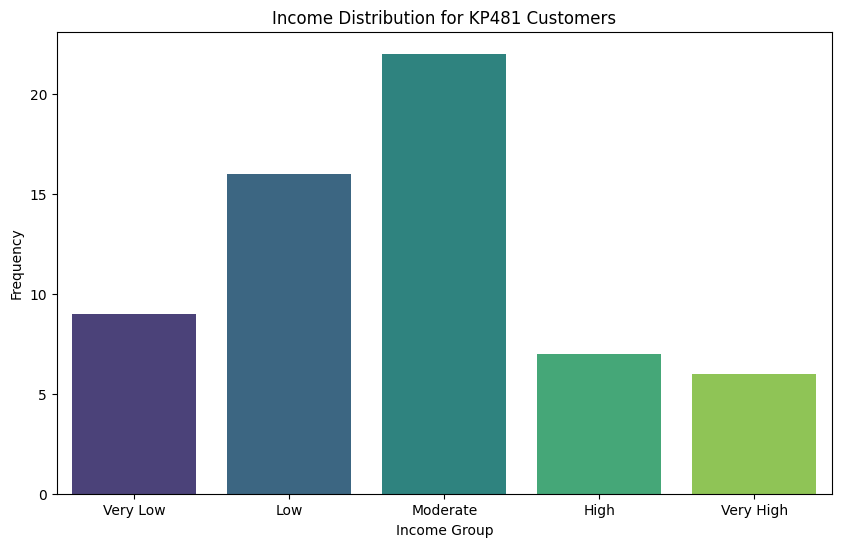

In [56]:
# Income Group Analysis with adjusted bins

# Define custom labels for income groups
num_bins = 5
income_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# Use pd.cut to create income bins
kp481_data['Income Group'] = pd.cut(kp481_data['Income'], bins=num_bins, labels=income_labels)

# Plot the income distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Income Group', data=kp481_data, palette='viridis')
plt.title('Income Distribution for KP481 Customers')
plt.xlabel('Income Group')
plt.ylabel('Frequency')
plt.show()


In [57]:
# Customer Profiling for KP781
kp781_data = df[df['Product'] == 'KP781']

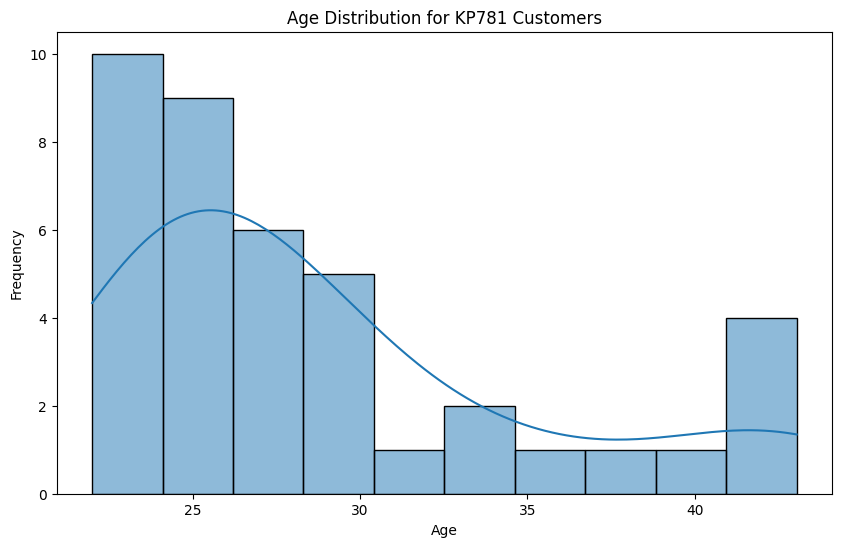

In [58]:
# Age Group Analysis
plt.figure(figsize=(10, 6))
sns.histplot(kp781_data['Age'], bins=10, kde=True)
plt.title('Age Distribution for KP781 Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

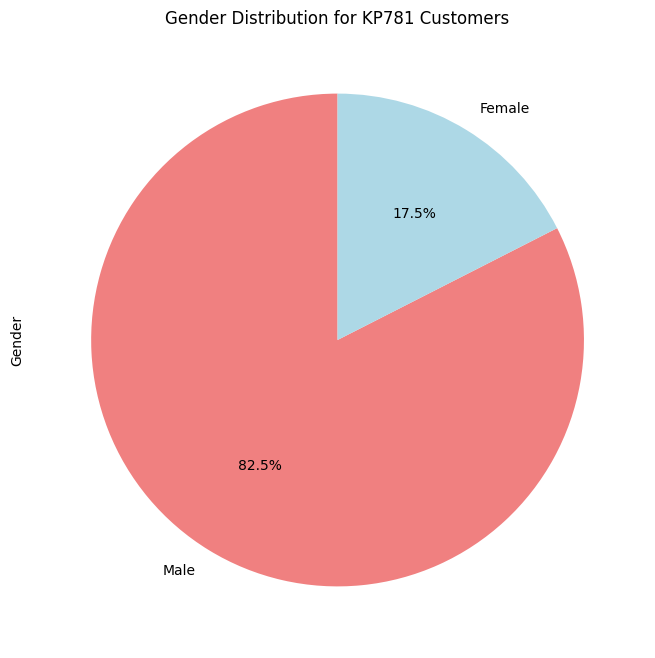

In [59]:
# Gender Analysis
plt.figure(figsize=(8, 8))
kp781_data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Gender Distribution for KP781 Customers')
plt.show()

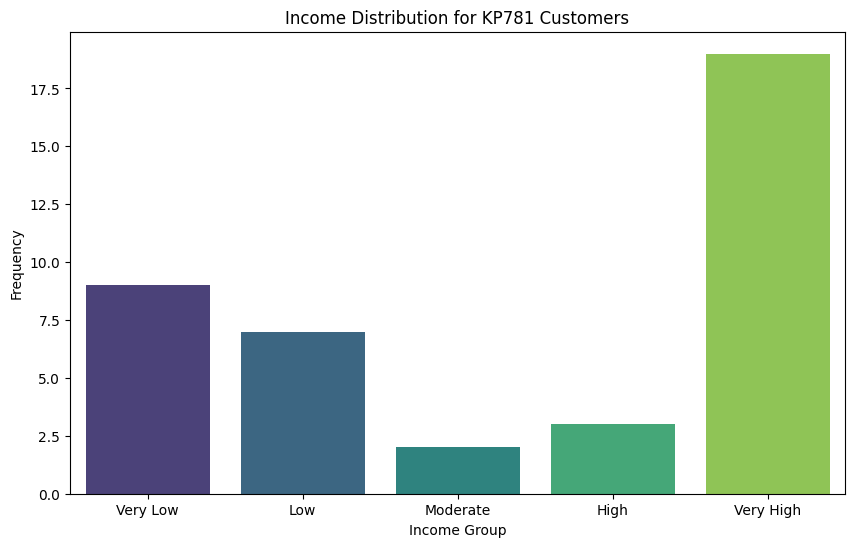

In [60]:
# Income Group Analysis with adjusted bins

# Define custom labels for income groups
num_bins = 5
income_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# Use pd.cut to create income bins
kp781_data['Income Group'] = pd.cut(kp781_data['Income'], bins=num_bins, labels=income_labels)

# Plot the income distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Income Group', data=kp781_data, palette='viridis')
plt.title('Income Distribution for KP781 Customers')
plt.xlabel('Income Group')
plt.ylabel('Frequency')
plt.show()

Recommendations



* Focus marketing efforts on the 20-30 age group for KP281,22-28 age group for KP481 and 22-25 age group for KP781 as identified in the age group analysis. Create advertising campaigns and promotions that appeal to this specific age demographic for all products.
* Since,there's a significant male preference for KP781, tailor marketing messages and features to align with the preferences of males.

* Adjust pricing or introduce promotions that cater to the low income range  among KP281 customers,moderate income range among KP481 customers and very high income range among KP781 customers. This can make products more attractive and affordable for the target audience.
* Develop engagement strategies, such as loyalty programs or exclusive content, specifically designed to retain and attract customers.
* Use customer feedback and preferences to inform potential product improvements or feature enhancements for all the treadmilla. Ensure that the products continue to meet the expectations and needs of the identified customer profile
* Develop educational content or support materials based on customer characteristics. For instance, create guides or resources that address the fitness goals and concerns of different age groups








